In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
relu = lambda x: np.maximum(0, x)

In [19]:
depth = 100
n = 2
paths_n = 200

ensemble = (np.random.rand(16,n)*2-1)
paths = np.array([np.random.choice(16, depth, replace=True) for _ in range(paths_n)])
outs = np.zeros_like(paths, dtype=float)
outs = outs[:, :, np.newaxis]
outs = outs.repeat(n, axis=2)


x = ensemble
for i in range(depth):
    A = np.random.rand(16, 16)*2-1
    b = (np.random.rand(16,1)*2-1).repeat(n, axis=1)
    
    x_ = (A @ x) + b
    
    for j, path in enumerate(paths):
        outs[j, i, :] = x_[path[i]]

    x = relu(x_)

ensemble.shape, paths.shape, outs.shape

((16, 2), (200, 100), (200, 100, 2))

In [105]:
def random_network_walk(ensemble, weights, paths_n=100):
    depth = len(weights)
    n = ensemble.shape[1]
    
    paths = np.array([np.random.choice(ensemble.shape[0], depth, replace=True) for _ in range(paths_n)])
    outs = np.zeros_like(paths, dtype=float)
    outs = outs[:, :, np.newaxis]
    outs = outs.repeat(n, axis=2)

    x = ensemble
    for i in range(depth):
        A = weights[i][0]
        b = weights[i][1]
        x_ = (A @ x) + b

        for j, path in enumerate(paths):
            outs[j, i, :] = x_[path[i]]

        x = relu(x_)

    return paths, outs

def gen_weights(d, depth):
    return [(np.random.rand(d, d)*2-1, (np.random.rand(d,1)*2-1).repeat(n, axis=1)) for _ in range(depth)]

In [156]:
n = 2
paths_n = 2000
ensemble = (np.random.rand(16,n)*2-1)
weights = gen_weights(16, 100)

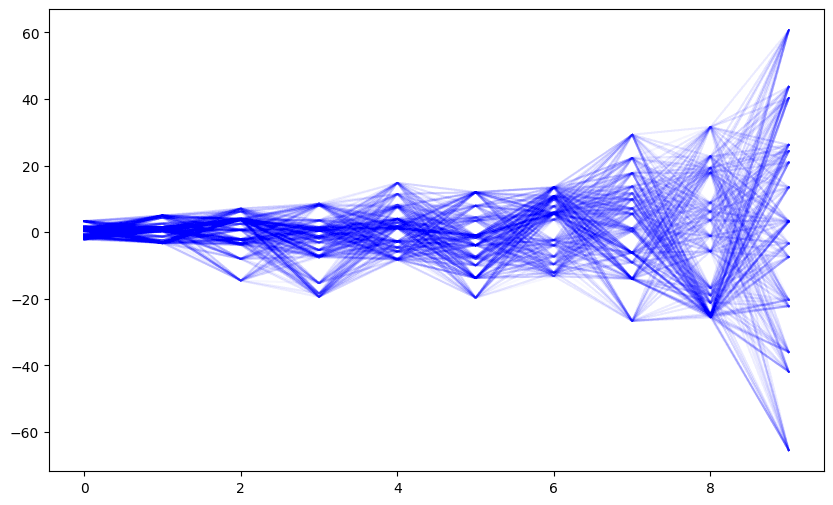

In [157]:
# Plot the first 10 paths for the first sample
paths, outs = random_network_walk(ensemble, weights, paths_n=paths_n)
plt.figure(figsize=(10,6))
for i in range(paths_n):
    plt.plot(outs[i, :10, 0], alpha=0.01, color='blue')
    